In [128]:
!pip3 install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [129]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score,fbeta_score,classification_report
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

In [130]:
predictions=pd.read_csv("predictions.csv")

In [131]:
predictions.head()

,actual,predicted
0,0,1
1,1,0
2,0,0
3,0,0
4,1,0


## Confusion matrix

<img src="Confusion%20Matrix%20Common.png" alt="Drawing" style="width: 300px;"/>

Confusion matrix, without normalization
[[3596  719]
 [ 538 3840]]


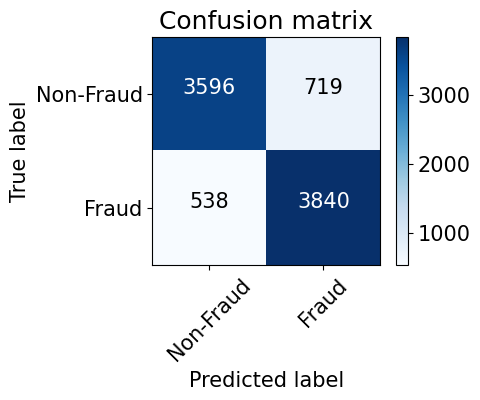

In [132]:
cnf_matrix=confusion_matrix(predictions.actual,predictions.predicted)
plt.figure(figsize=(5, 4))
plot_confusion_matrix(cnf_matrix, classes=['Non-Fraud','Fraud'],
                      title='Confusion matrix')

## Accuracy

![Alt text](accuracy.svg)


In [133]:
accuracy_score(predictions.actual,predictions.predicted)

0.8554008972736684

In [134]:
(3596+3840)/(3596+3840+719+538)

0.8554008972736684

## Recall

![Alt text](recall.svg)

In [135]:
recall_score(predictions.actual,predictions.predicted)

0.8771128369118318

In [136]:
3840/(3840+538)

0.8771128369118318

## Precision

![Alt text](precision.svg)

In [137]:
precision_score(predictions.actual,predictions.predicted)

0.8422899758719017

In [138]:
3840/(3840+719)

0.8422899758719017

## F-score

![Alt text](f_score.svg)

In [139]:
f1_score(predictions.actual,predictions.predicted)

0.8593487747566297

In [140]:
2*(0.8422899758719017*0.8771128369118318/(0.8422899758719017+0.8771128369118318))

0.8593487747566297

In [141]:
fbeta_score(predictions.actual,predictions.predicted, beta=1)

0.8593487747566297

In [142]:
fbeta_score(predictions.actual,predictions.predicted, beta=2)

0.8699198042680439

In [143]:
fbeta_score(predictions.actual,predictions.predicted, beta=0.0001)

0.8422899762063051

In [144]:
fbeta_score(predictions.actual,predictions.predicted, beta=10000)

0.8771128365492065

## Classification Report

In [145]:
report=classification_report(predictions.actual,predictions.predicted, target_names=['Non-Fraud', 'Fraud'])
print(report)

              precision    recall  f1-score   support

   Non-Fraud       0.87      0.83      0.85      4315
       Fraud       0.84      0.88      0.86      4378

    accuracy                           0.86      8693
   macro avg       0.86      0.86      0.86      8693
weighted avg       0.86      0.86      0.86      8693



## Примеры использования

In [146]:
predictions2=pd.read_csv("predictions2.csv")

Confusion matrix, without normalization
[[3596  719]
 [  13   87]]


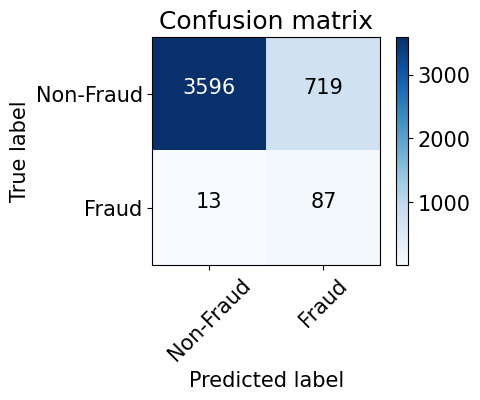

In [147]:
cnf_matrix=confusion_matrix(predictions2.actual,predictions2.predicted)
plt.figure(figsize=(5, 4))
plot_confusion_matrix(cnf_matrix, classes=['Non-Fraud','Fraud'],
                      title='Confusion matrix')

In [148]:
accuracy_score(predictions2.actual,predictions2.predicted)

0.8342015855039637

In [149]:
recall_score(predictions2.actual,predictions2.predicted)

0.87

In [150]:
precision_score(predictions2.actual,predictions2.predicted)

0.10794044665012408

In [151]:
f1_score(predictions2.actual,predictions2.predicted)

0.19205298013245034

In [152]:
fbeta_score(predictions2.actual,predictions2.predicted,beta=3)

0.5099648300117233

In [153]:
report=classification_report(predictions2.actual,predictions2.predicted, target_names=['Non-Fraud', 'Fraud'])
print(report)

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.83      0.91      4315
       Fraud       0.11      0.87      0.19       100

    accuracy                           0.83      4415
   macro avg       0.55      0.85      0.55      4415
weighted avg       0.98      0.83      0.89      4415



In [154]:
predictions3=pd.read_csv("predictions3.csv")

## Самостоятельно

Confusion matrix, without normalization
[[3596   10]
 [ 682   87]]


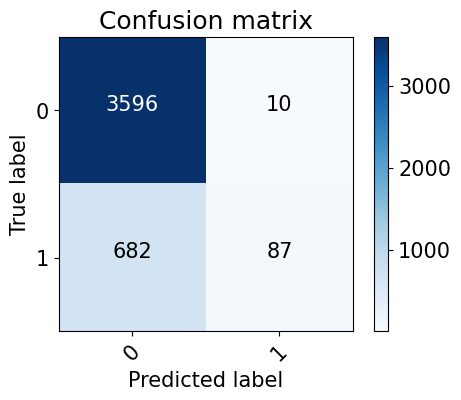

              precision    recall  f1-score   support

   Non-Fraud       0.84      1.00      0.91      3606
       Fraud       0.90      0.11      0.20       769

    accuracy                           0.84      4375
   macro avg       0.87      0.56      0.56      4375
weighted avg       0.85      0.84      0.79      4375

 accuracy_score:   0.8418285714285715 
 recall_score:     0.11313394018205461 
 precision_score:  0.8969072164948454 
 f1_score:         0.20092378752886833


In [168]:
cnf_matrix = confusion_matrix(predictions3.actual, predictions3.predicted)
plt.figure(figsize=(5, 4))
plot_confusion_matrix(cnf_matrix, classes=["0", "1"], title="Confusion matrix")
plt.show()
report = classification_report(
    predictions3.actual, predictions3.predicted, target_names=["Non-Fraud", "Fraud"]
)
print(report)
print(
    " accuracy_score:  ",
    accuracy_score(predictions3.actual, predictions3.predicted),
    "\n",
    "recall_score:    ",
    recall_score(predictions3.actual, predictions3.predicted),
    "\n",
    "precision_score: ",
    precision_score(predictions3.actual, predictions3.predicted),
    "\n",
    "f1_score:        ",
    f1_score(predictions3.actual, predictions3.predicted),
)
